In [75]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import *
from stats import *

In [76]:
def f(x,A):
    if x>0 and x<(3*np.pi/2):
        return A*(np.cos(x)*np.cos(x))
    return 0

Plotting the function

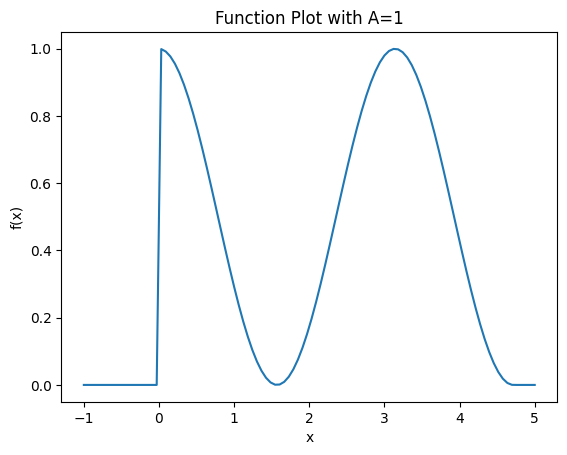

In [77]:
x = np.linspace(-1,5,100)
y = [f(i,1) for i in x]

plt.plot(x,y)
plt.title("Function Plot with A=1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

<h3>Finding Area for Nomalization

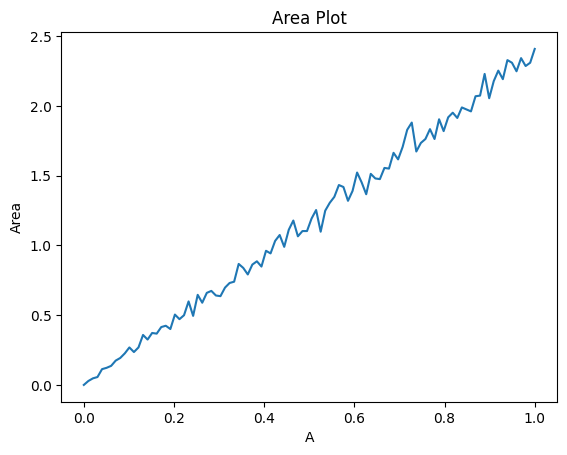

In [94]:
A_s = np.linspace(0,1,100)
xmin,xmax = 0,3*np.pi/2
areas = [Hit_or_miss(f,xmin,xmax,1,N=1000,A=i)[0] for i in A_s]
plt.plot(A_s,areas)
plt.title("Area Plot")
plt.xlabel("A")
plt.ylabel("Area")
plt.show()

In [79]:
print(1/Hit_or_miss(f,xmin,xmax,1,N=1000,A=1)[0])

0.413658071713828


<h4>Finding the A value

In [80]:
def find_A(ymax=1,prec=.01):
    '''returns A value and area(A)'''
    
    area = 0
    i=0              #A iterative value
    while area < 1:
        i+=prec
        area = Hit_or_miss(f,xmin,xmax,i,N=1000,A=i)[0]
        
    return i,area

In [81]:
def find_A2(prec=.001):
    '''returns A value and area(A)'''
    
    area = 0
    i=0              #A iterative value
    while area < 1:
        i+=prec
        area = Montecarlo(f,xmin,xmax,N=1000,A=i)[0]
    return i,area

In [82]:
A_0 = find_A(ymax=1)[0]
A_1 = find_A2()[0]
A_2 = 1/Hit_or_miss(f,xmin,xmax,1,N=1000,A=1)[0]
print("A for normalised pdf:",A_0,A_2)

A for normalised pdf: 0.4100000000000002 0.41855343350925794


In [83]:
area = Montecarlo(f,xmin,xmax,N=1000,A=A_0)
print(area)

(0.9840456129245719, 0.021410505372482305)


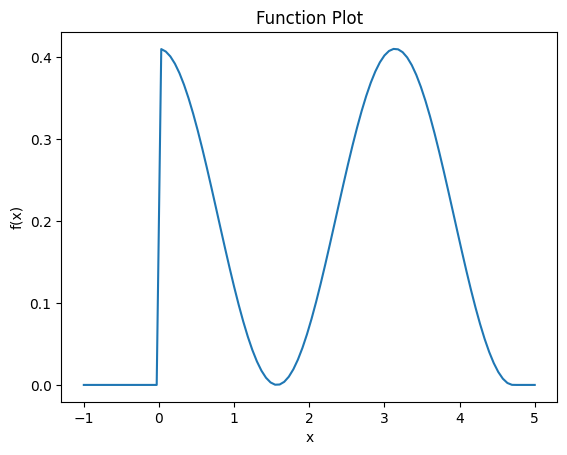

In [84]:
x = np.linspace(-1,5,100)
y = [f(i,A_0) for i in x]

plt.plot(x,y)
plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

<h3>TAC distribution

In [85]:
data = [rand_TAC(f,xmin,xmax,A_0,A=A_0) for i in range(10000)]

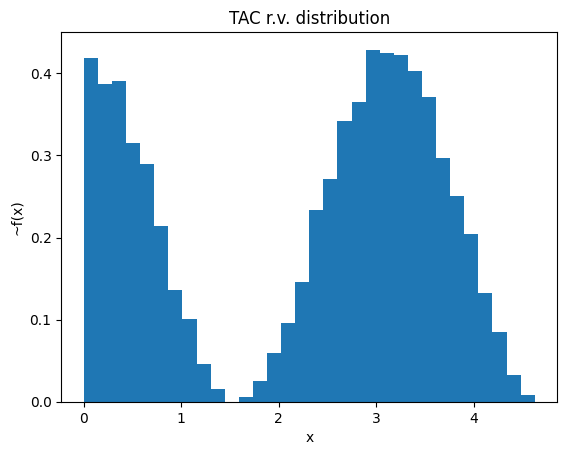

In [86]:
plt.hist(data,bins=sturges(data),density = True)
plt.title("TAC r.v. distribution")
plt.xlabel("x")
plt.ylabel("~f(x)")
plt.show()

Moments of the distribution

In [87]:
mean, var, skew, kurt = stat(data)
print("Moments of the distribution:",mean,var,skew,kurt, sep='\n')

Moments of the distribution:
2.252533694890941
1.3580410805469858
-0.41089593342225134
-1.3523997673574364


<h3>Central Limit Teorem

In [88]:
def rand_TCL(N):
    '''returns sigle rand value with TCL'''
    return np.mean([rand_TAC(f,xmin,xmax,1,A=A_0) for i in range(N)])

Moments mean,var,skew,kurt: 
 (2.2535725591416704, 0.13213226967445055, -0.09515187484823184, -0.059007656868605096)


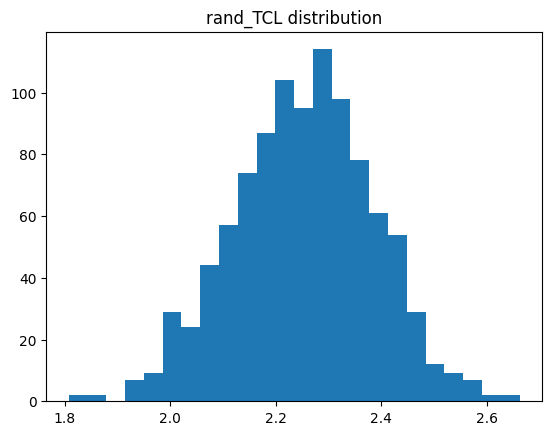

In [89]:
dist = [rand_TCL(100) for i in range(1000)]

plt.hist(dist,bins=sturges(dist))
plt.title("rand_TCL distribution")
print("Moments mean,var,skew,kurt: \n",stat(dist))
plt.show()

Plot of skewness and Kurtosis

In [90]:
# sk,kr = [],[]
# x = [10,100,500,1000,1500,3000,4000]
# for i in x:
#     data = [rand_TCL(100) for j in range(i)]   #x in rand_TCL(x) should also increase but kept fixed for efficiency
#     s,k = skewness(data),kurtosis(data)
#     sk.append(s)
#     kr.append(k)
# plt.scatter(x,sk)
# plt.scatter(x,kr)
# plt.legend(['skewness','kurtosis'])
# plt.xlabel('N')
# plt.show()

skewn and kurtosis --> 0 for N-->+inf